In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
df1 = pd.read_csv("C:/Users/Admin/Downloads/adult.data.csv",na_values="?",index_col=False)

In [3]:
df2=df1

In [4]:
df2 = df2.apply(lambda x : x.replace(' ?',np.nan))

In [5]:
df2.dropna(inplace=True)

In [6]:
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df2['wage_class']=df1['wage_class'].map(lambda x : 1 if x == ' >50K.' else 0)

In [8]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df1['wage_class']=df1['wage_class'].map(lambda x : 1 if x == ' >50K.' else 0)

In [10]:
df1['native_country']=df1['native_country'].map(lambda x : 1 if x == ' United-States' else 0)

In [11]:
df1['race']=df1['race'].map(lambda x : 1 if x == ' White' else 0)

In [12]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,Male,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,Male,0,0,13,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,Male,0,0,40,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,Male,0,0,40,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,Female,0,0,40,0,0


In [13]:
df1.shape

(48842, 15)

In [14]:
pd.DataFrame([df1.dtypes],index = ['df1']).T

,df1
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,int64
sex,object


In [15]:
df1 = df1.apply(lambda x : x.replace(' ?',np.nan))

In [16]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,Male,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,Male,0,0,13,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,Male,0,0,40,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,Male,0,0,40,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,Female,0,0,40,0,0


In [17]:
df1.dropna(inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [19]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,Male,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,Male,0,0,13,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,Male,0,0,40,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,Male,0,0,40,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,Female,0,0,40,0,0


In [20]:
encod = ['education','native_country','marital_status','relationship','education_num','occupation','race','sex','workclass','hours_per_week','fnlwgt']
for i in encod:
    df1[i] = labelencoder.fit_transform(df1[i])

In [21]:
#df1.sample(15, random_state = 200)
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,3254,9,12,4,0,1,1,1,2174,0,39,1,0
1,50,4,3557,9,12,2,3,0,1,1,0,0,12,1,0
2,38,2,17377,11,8,0,5,1,1,1,0,0,39,1,0
3,53,2,18947,1,6,2,5,0,0,1,0,0,39,1,0
4,28,2,24086,9,12,2,9,5,0,0,0,0,39,0,0


In [22]:
pd.DataFrame([df1.dtypes],index = ['df1']).T

,df1
age,int64
workclass,int32
fnlwgt,int64
education,int32
education_num,int64
marital_status,int32
occupation,int32
relationship,int32
race,int64
sex,int32


In [23]:
X = df1.iloc[:,:-1].values
y = df1.iloc[:,-1:].values

In [24]:
df1.shape

(46033, 15)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# LOGISTIC REGRESSION

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [28]:
y_pred = model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
model.score(X_test, y_test)

Accuracy: 0.08406647116324535
Precision: 0.08406647116324535
Recall: 1.0


0.08406647116324535

# Accuracy of Logistic Regression = 0.084

# Naive BAYES

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [30]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.8862821766047573


# NAIVE BAYES SCORE = 0.8862

# RANDOM FOREST CLASSIFIER

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

<ipython-input-31-8e1d94955b32>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


ACCURACY OF THE MODEL:  0.9090909090909091


# ACCURACY OF THE RFR:  0.9093081351145867

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
y_pred=knn.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0 0 0 ... 0 0 0]
ACCURACY OF THE MODEL:  0.9144129466710111


# Accuracy of the KNN = 0.9144129466710111

# THE BEST MODEL IS KNN with Accuracy of 0.9144

In [33]:
a=0.08406
b=0.8862
c=0.9093
d=0.9144

In [34]:
import matplotlib.pyplot as plt
algos = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'KNN']
vals = [a,b,c,d]

<BarContainer object of 4 artists>

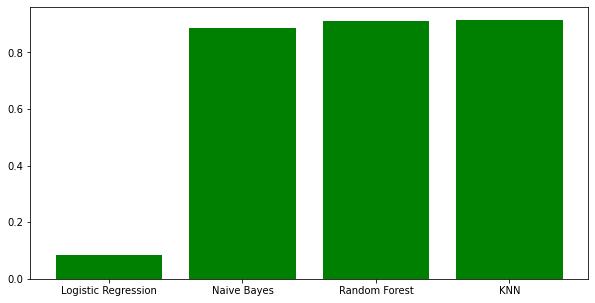

In [35]:
fig = plt.figure(figsize = (10, 5))
plt.bar(algos, vals, color='green')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

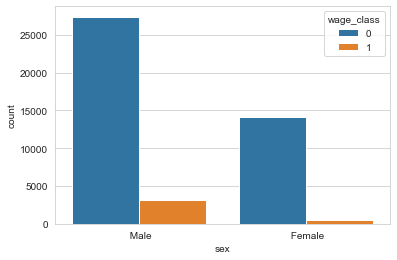

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
sns.set_style('whitegrid')
%matplotlib inline
sns.countplot('sex',data=df2,hue='wage_class')

# Wage_Class 0 = <50K, Wage_Class 1 = >50K

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


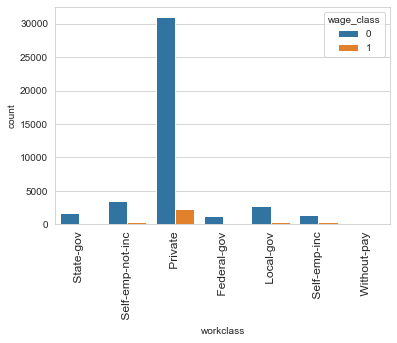

In [37]:
g = sns.countplot('workclass',data=df2,hue='wage_class')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


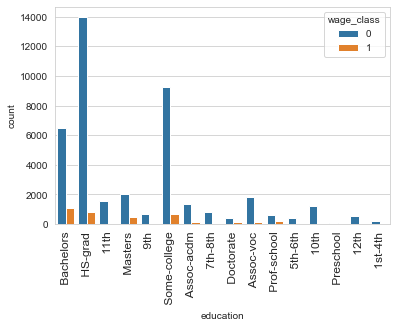

In [38]:
g = sns.countplot('education',data=df2,hue='wage_class')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


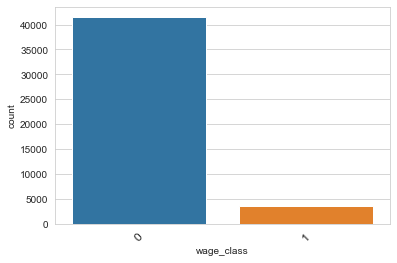

In [39]:
g = sns.countplot('wage_class',data=df2) 
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 12)
plt.show()

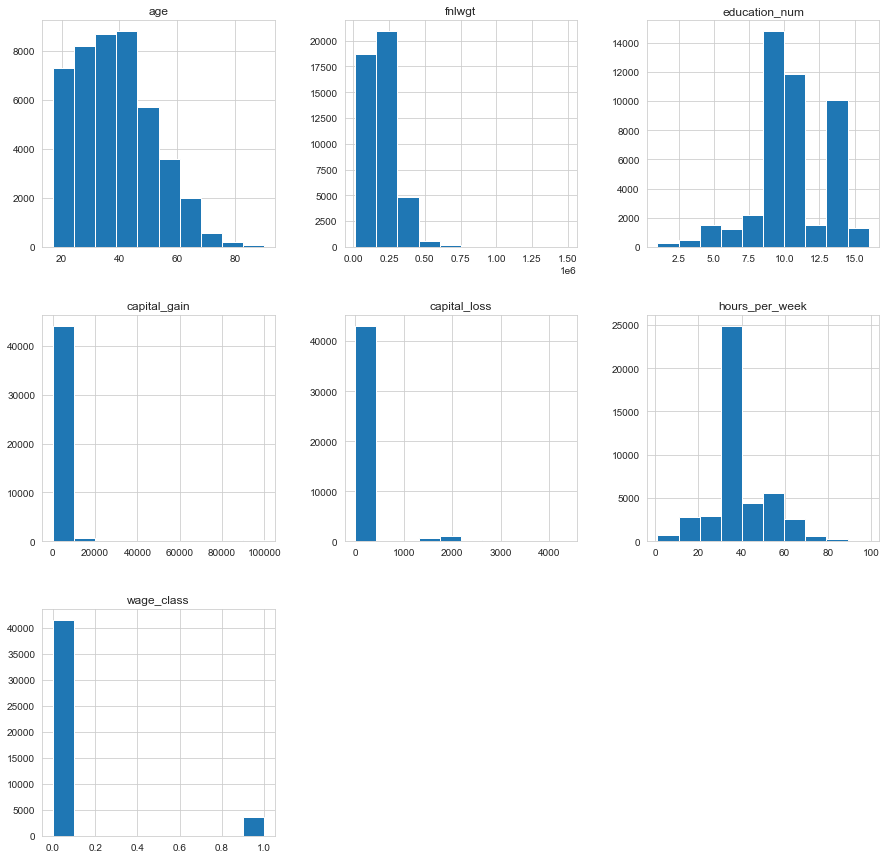

In [40]:
pd.DataFrame.hist(df2,figsize = [15,15])
plt.show()